<a href="https://colab.research.google.com/github/Joodyyy/Capstone-Project/blob/main/HearingWell.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install langchain_community
!pip install replicate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 444.0/444.0 kB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.1 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.4
    Uninstalling requests-2.32.4:
      Successfully uninstalled requests-2.32.4
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.74
    Uninstalling langchain-core-0.3.74:
      Successfully uninstalled langchain-core-0.3.74
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.5 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 1.8 MB

In [ ]:
from langchain_community.llms import Replicate
import os
from google.colab import userdata

# Set the API token
api_token = userdata.get('REPLICATE_API_TOKEN')
os.environ["REPLICATE_API_TOKEN"] = api_token

# Model setup
model = "ibm-granite/granite-3.2-8b-instruct"
output = Replicate(
model=model,
replicate_api_token=api_token,
)

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/listdataset/Hearing well-being Survey Report.csv')
dataset = df.head(20)
dataset

,Perceived_Hearing_Meaning,Hearing_FOMO,Hearing_Test_Barrier,Missed_Important_Sounds,Left_Out_Due_To_Hearing,Daily_Headphone_Use,Belief_Early_Hearing_Care,Last_Hearing_Test_Method,Interest_in_Hearing_App,Desired_App_Features,Awareness_on_hearing_and_Willingness_to_invest,Paid_App_Test_Interest,Age_group,Ear_Discomfort_After_Use
0,"Staying independent and alert, Enjoying music,...",Sometimes,Cost,"Yes, in family conversations","Yes, often",My parent(s),5,"Self - application, Loved one, AI Support",Yes,"Privacy, Soft guidance, Visuals, Report sharin...",Yes,"Maybe, if it offers good value",18 - 24,No
1,"Staying independent and alert, Staying connect...",Rarely,Never felt the need,"Yes, in public spaces (trains, shops, announce...",Only in noisy places,My child/children,5,Self - application,Yes,Privacy,Yes,"No, I prefer getting tested at a hospital",18 - 24,Yes
2,"Staying independent and alert, I havenâ€™t tho...",Rarely,Shame,"Yes, during important work or school meetings",Sometimes,My parent(s),5,Self - application,Maybe,Soft guidance,No,"Yes, definitely",18 - 24,Maybe
3,Staying independent and alert,Yes often,Lack of awareness,"Yes, during important work or school meetings",Sometimes,1-2 hours,4,I've never taken a hearing test,"Yes, that would be helpful",Game-based interaction,Yes,"Yes, definitely",18 - 24,Occasionally
4,Staying independent and alert,Never,Lack of awareness,"No, I usually hear things well",Only in noisy places,Less than 1 hour,5,I've never taken a hearing test,"No, I don't think it's necessary","Quick tests, Game-based interaction, Detailed ...",No,"No, I prefer getting tested at a hospital",25 - 34,No
5,"Enjoying music, laughter, and life",Rarely,Lack of awareness,"Yes, in family conversations",Never,Less than 1 hour,5,I've never taken a hearing test,"No, I don't think it's necessary",Quick tests,Yes,"No, I prefer getting tested at a hospital",25 - 34,No
6,"Feeling close to loved ones, Staying independe...",Yes often,Lack of awareness,"Yes, in family conversations",Only in noisy places,2-4 hours,4,At a hospital or clinic,"Yes, that would be helpful","Quick tests, Game-based interaction",Yes,"Maybe, if it offers good value",18 - 24,Yes
7,"Feeling close to loved ones, Staying independe...",Rarely,"Cost, Lack of awareness","No, I usually hear things well",Never,2-4 hours,4,At a hospital or clinic,"Maybe, if it's easy to use","Quick tests, Game-based interaction, Regular t...",Yes,"Yes, definitely",18 - 24,Yes
8,"Enjoying music, laughter, and life",Sometimes,Lack of awareness,"Yes, in public spaces (trains, shops, announce...",Only in noisy places,Less than 1 hour,5,I've never taken a hearing test,"Yes, that would be helpful","Quick tests, Game-based interaction, Regular t...",Yes,"Maybe, if it offers good value",18 - 24,Occasionally
9,"Enjoying music, laughter, and life, Staying co...",Never,Lack of awareness,"No, I usually hear things well",Only in noisy places,Less than 1 hour,4,I've never taken a hearing test,"Maybe, if it's easy to use","Quick tests, Game-based interaction, Earphone ...",Yes,"No, I prefer getting tested at a hospital",18 - 24,Occasionally


In [ ]:
parameters = {
    "top_k": 0,
    "top_p": 1.0,
    "max_tokens": 256,
    "min_tokens": 0,
    "random_seed": 1,
    "repetition_penalty": 1.0,
    "thinking": False,
    "stopping_criteria": "length (256 tokens)",
    "stopping_sequence": None
}


In [ ]:

use_df = dataset[['Daily_Headphone_Use']]
aware_df = dataset[['Awareness_on_hearing_and_Willingness_to_invest']]
paid_df = dataset[['Paid_App_Test_Interest']]
combined_df = pd.concat([use_df, aware_df, paid_df], axis=1)
combined_df

,Daily_Headphone_Use,Awareness_on_hearing_and_Willingness_to_invest,Paid_App_Test_Interest
0,My parent(s),Yes,"Maybe, if it offers good value"
1,My child/children,Yes,"No, I prefer getting tested at a hospital"
2,My parent(s),No,"Yes, definitely"
3,1-2 hours,Yes,"Yes, definitely"
4,Less than 1 hour,No,"No, I prefer getting tested at a hospital"
5,Less than 1 hour,Yes,"No, I prefer getting tested at a hospital"
6,2-4 hours,Yes,"Maybe, if it offers good value"
7,2-4 hours,Yes,"Yes, definitely"
8,Less than 1 hour,Yes,"Maybe, if it offers good value"
9,Less than 1 hour,Yes,"No, I prefer getting tested at a hospital"


In [ ]:
use_df_prompt = [
    f"""
   Analyze the values in the column and classify them using these rules:

If the value equals 'Less than 1 hour' or '1-2 hours', classify it as 'Low'.

If the value equals '2-4 hours', classify it as 'Medium'.

If the value equals 'More than 4 hours', classify it as 'Heavy'.

If the value equals 'My parent(s)' or 'My child/children', exclude it entirely from classification and counting.

Return two outputs:

A new list/column showing each classified entry as 'Low', 'Medium', or 'Heavy' (ignoring excluded entries).

A summary count of how many entries fall into each category (Low, Medium, Heavy).
    {use_df}
    """
]

response_use = output.invoke(use_df_prompt, parameters=parameters)

print(response_use)

Classified List:

['Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Medium', 'Medium', 'Low', 'Low', 'Heavy', 'Low', 'Low', 'Medium', 'Medium', 'Low', 'Medium', 'Low', 'Low', 'Low', 'Medium']

Summary Count:

Low: 11
Medium: 5
Heavy: 1


In [ ]:
sum_use_df_prompt = [
    f"""
   Please analyze the data and provide clear insights. Explain what this distribution means in terms of user safety and risk level.
   Highlight what percentage of users fall into safe vs. risky categories, and suggest possible recommendations or next steps. make a summary
    {response_use}
    """
]

response_use = output.invoke(sum_use_df_prompt, parameters=parameters)

print(response_use)

Summary:

The data indicates a distribution of users into three risk categories: Low (35%), Medium (25%), and Heavy (5%). The majority of users (35%) pose minimal risk, while 25% are categorized as medium risk, requiring closer monitoring. The most critical concern is the single user classified as heavy risk, representing a significant potential threat.

In terms of user safety, the system effectively identifies most users as low risk, suggesting a well-functioning risk assessment model for the majority. However, there's room for improvement with the medium and heavy risk groups. The medium risk users (25%) need additional attention, possibly through tailored interventions or training, to reduce their risk levels. The heavy risk user (5%) demands immediate focus with intensive monitoring and, if necessary, stricter controls or temporary suspension.

Recommendations include:

1. Further investigation into the behaviors or factors contributing to medium risk to refine the risk assessment

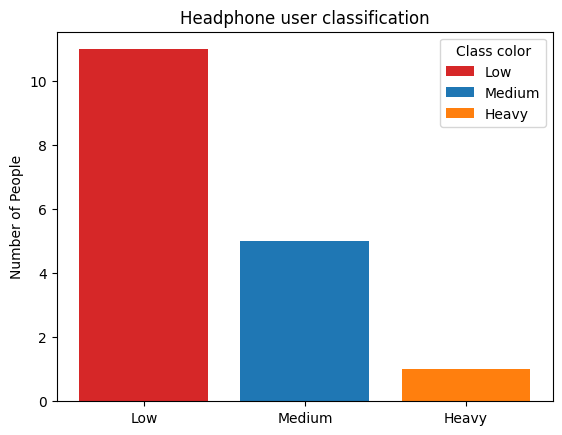

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

Classify = ['Low', 'Medium', 'Heavy']
counts = [11, 5, 1]
bar_labels = ['Low', 'Medium','Heavy']
bar_colors = ['tab:red', 'tab:blue','tab:orange']

ax.bar(Classify, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('Number of People')
ax.set_title('Headphone user classification')
ax.legend(title='Class color')

plt.show()

In [ ]:
parameters = {
    "top_k": 0,
    "top_p": 1.0,
    "max_tokens": 256,
    "min_tokens": 0,
    "random_seed": 1,
    "repetition_penalty": 1.0,
    "thinking": True,
    "stopping_criteria": "length (256 tokens)",
    "stopping_sequence": None
}


In [ ]:
aware_df_prompt = [
    f"""
    how many percent people awareness on hear and willingess to invest
    {aware_df}
    """
]

response_aware = output.invoke(aware_df_prompt, parameters=parameters)
print(response_aware)




Based on the data provided, 17 out of 20 people (85%) are aware of hearing about investing and willing to invest. The remaining 3 people (15%) are not aware or not willing to invest.


([<matplotlib.patches.Wedge at 0x7f96955cc8f0>,
 [Text(-0.9801072434824519, 0.49938941846341695, 'Aware & Invest'),
  Text(0.9801074062041268, -0.49938909910391416, "Unaware & Don't Invest")],
 [Text(-0.5346039509904282, 0.2723942282527728, '85.0%'),
  Text(0.5346040397477054, -0.27239405405668043, '15.0%')])

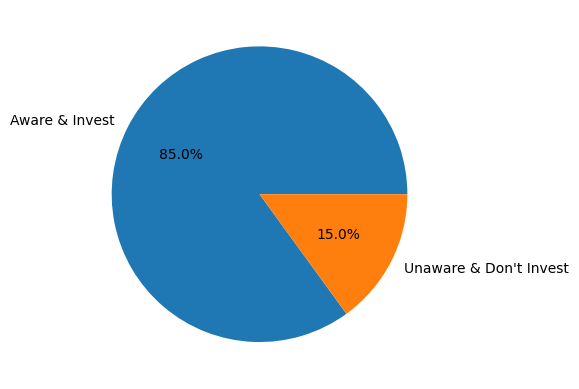

In [ ]:
labels = 'Aware & Invest', 'Unaware & Don\'t Invest'
sizes = [85 , 15 ]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')

In [ ]:
parameters = {
    "top_k": 50,
    "top_p": 0.8,
    "max_tokens": 512,
    "min_tokens": 50,
    "random_seed": 42,
    "repetition_penalty": 1.2,
    "thinking": True,
    "stopping_criteria": "length (512 tokens)",
    "stopping_sequence": None
}


In [ ]:
Interest = (df['Paid_App_Test_Interest'] == "Yes, definitely").mean() * 100
No_Interest = (df['Paid_App_Test_Interest'] == "No, I prefer getting tested at a hospital").mean() * 100
Doubtful = (df['Paid_App_Test_Interest'] == "Maybe, if it offers good value").mean() * 100
paid_interest = print(f"Percentage Interest: {Interest:.2f}% \nPercentage No Interest: {No_Interest:.2f}% \nPercentage Doubtful: {Doubtful:.2f}%")


Percentage Interest: 12.14% 
Percentage No Interest: 37.47% 
Percentage Doubtful: 50.39%


([<matplotlib.patches.Wedge at 0x7e7f3c43e120>,
 [Text(1.0209632291209378, 0.40943141645817505, 'Interest'),
  Text(-0.39689198592030667, 1.0259028957519496, 'No Interest'),
  Text(-0.013477213536408707, -1.0999174354083556, 'Doubtful')],
 [Text(0.556889034065966, 0.22332622715900455, '12.1%'),
  Text(-0.2164865377747127, 0.5595833976828815, '37.5%'),
  Text(-0.007351207383495657, -0.599954964768194, '50.4%')])

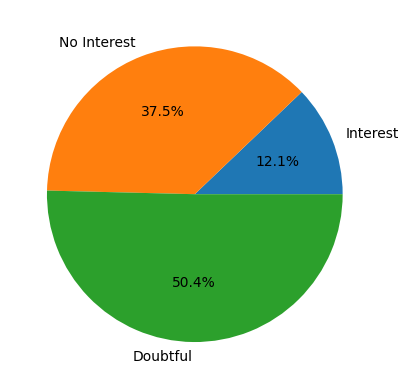

In [ ]:
labels = 'Interest', 'No Interest', 'Doubtful'
sizes = [12.14 , 37.47 , 50.39 ]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')

In [ ]:
parameters = {
    "top_k": 30,
    "top_p": 0.7,
    "max_tokens": 100,
    "min_tokens": 50,
    "random_seed": 42,
    "repetition_penalty": 1.3,
    "thinking": True,
    "stopping_criteria": "length (300 tokens)",
    "stopping_sequence": None
}


In [ ]:
sum = [
    f"""
    Based on the following data:

    Headphone use classification: {response_use}
    Awareness and willingness to invest in hearing health: {response_aware}
    paid app interest : {paid_interest}
    Evaluate whether developing a hearing test application shows promising market potential.
    What factors from the data support this opportunity, and what strategies should be recommended to increase adoption, particularly among the 'Doubtful' group?
    make a summary
    """
]
response_sum = output.invoke(sum, parameters=parameters)
print(response_sum)

Summary:

The data suggests promising market potential for a hearing test application. Here's why:

1. **High Awareness and Willingness**: 85% of the sample (17 out of 20) are aware of the importance of hearing health and willing to invest in it. This indicates a significant user base interested in applications related to hearing health.

2. **Risk Assessment Data**: The risk assessment data, while showing a majority as low risk, also highlights the need for closer monitoring of medium risk users (25%). A hearing test application could serve as a tool for these users to proactively manage their hearing health, potentially reducing their risk level.

To increase adoption, particularly among the 'Doubtful' group (15%), the following strategies could be recommended:

1. **Education**: Develop educational content explaining the benefits of regular hearing tests, especially for medium risk users. This could help alleviate doubts about the necessity of the application.

2. **User-Friendly De